In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

In [57]:
df = pd.read_csv('women_empowerment_index.csv')

In [58]:
df.head()

,Country,Women's Empowerment Index (WEI) - 2022,Women's Empowerment Group - 2022,Global Gender Parity Index (GGPI) - 2022,Gender Parity Group - 2022,Human Development Group - 2021,Sustainable Development Goal regions
0,Australia,0.805,High,0.870,High,Very high,Australia and New Zealand
1,Belgium,0.801,High,0.869,High,Very high,Europe and Northern America
2,Denmark,0.804,High,0.845,High,Very high,Europe and Northern America
3,Iceland,0.816,High,0.914,High,Very high,Europe and Northern America
4,Norway,0.802,High,0.887,High,Very high,Europe and Northern America


In [59]:
df.tail()

,Country,Women's Empowerment Index (WEI) - 2022,Women's Empowerment Group - 2022,Global Gender Parity Index (GGPI) - 2022,Gender Parity Group - 2022,Human Development Group - 2021,Sustainable Development Goal regions
109,Türkiye,0.498,Low,0.511,Low,Very high,Northern Africa and Western Asia
110,Uganda,0.463,Low,0.672,Lower-middle,Low,Sub-Saharan Africa
111,Yemen,0.141,Low,0.141,Low,Low,Northern Africa and Western Asia
112,Zambia,0.441,Low,0.637,Lower-middle,Medium,Sub-Saharan Africa
113,Zimbabwe,0.519,Low,0.655,Lower-middle,Medium,Sub-Saharan Africa


In [60]:
df.shape

(114, 7)

In [61]:
df.columns

Index(['Country', 'Women's Empowerment Index (WEI) - 2022',
       'Women's Empowerment Group - 2022',
       'Global Gender Parity Index (GGPI) - 2022',
       'Gender Parity Group - 2022', 'Human Development Group - 2021',
       'Sustainable Development Goal regions'],
      dtype='object')

In [62]:
df.describe()

,Women's Empowerment Index (WEI) - 2022,Global Gender Parity Index (GGPI) - 2022
count,114.000000,114.000000
mean,0.607316,0.705237
std,0.134632,0.128897
min,0.141000,0.141000
25%,0.518000,0.622250
50%,0.615000,0.726500
75%,0.705500,0.802000
max,0.828000,0.925000


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   114 non-null    object 
 1   Women's Empowerment Index (WEI) - 2022    114 non-null    float64
 2   Women's Empowerment Group - 2022          114 non-null    object 
 3   Global Gender Parity Index (GGPI) - 2022  114 non-null    float64
 4   Gender Parity Group - 2022                114 non-null    object 
 5   Human Development Group - 2021            114 non-null    object 
 6   Sustainable Development Goal regions      114 non-null    object 
dtypes: float64(2), object(5)
memory usage: 6.4+ KB


In [64]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Country                                     0
Women's Empowerment Index (WEI) - 2022      0
Women's Empowerment Group - 2022            0
Global Gender Parity Index (GGPI) - 2022    0
Gender Parity Group - 2022                  0
Human Development Group - 2021              0
Sustainable Development Goal regions        0
dtype: int64


In [65]:
df['Women\'s Empowerment Index (WEI) - 2022'] = pd.to_numeric(df['Women\'s Empowerment Index (WEI) - 2022'], errors='coerce')
df['Global Gender Parity Index (GGPI) - 2022'] = pd.to_numeric(df['Global Gender Parity Index (GGPI) - 2022'], errors='coerce')

In [66]:
print(df.dtypes)

Country                                      object
Women's Empowerment Index (WEI) - 2022      float64
Women's Empowerment Group - 2022             object
Global Gender Parity Index (GGPI) - 2022    float64
Gender Parity Group - 2022                   object
Human Development Group - 2021               object
Sustainable Development Goal regions         object
dtype: object


In [67]:
print("Shape before removing duplicates:", df.shape)
df.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", df.shape)

Shape before removing duplicates: (114, 7)
Shape after removing duplicates: (114, 7)


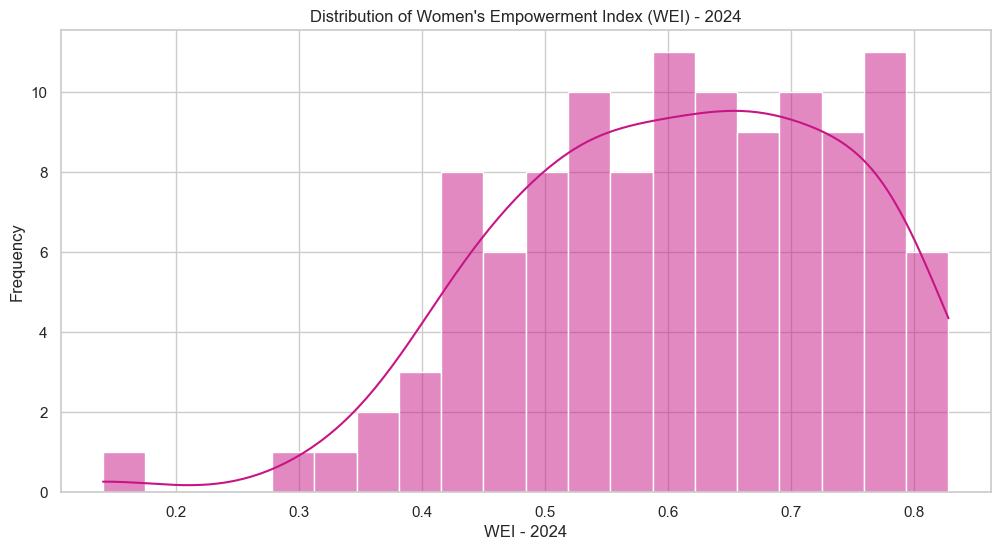

In [70]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Women\'s Empowerment Index (WEI) - 2022'], kde=True, bins=20, color='mediumvioletred')
plt.title('Distribution of Women\'s Empowerment Index (WEI) - 2022')
plt.xlabel('WEI - 2022')
plt.ylabel('Frequency')
plt.show()

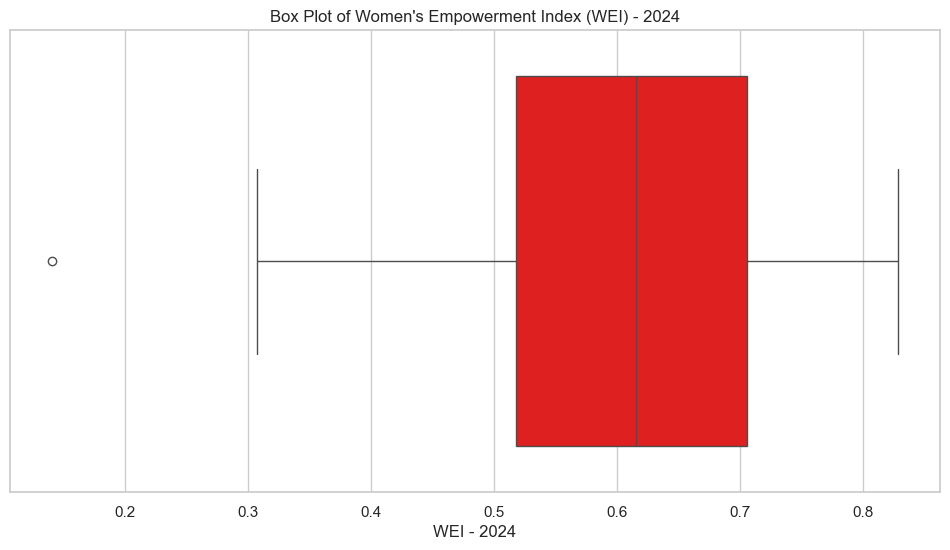

In [71]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Women\'s Empowerment Index (WEI) - 2022', data=df, color='red')
plt.title('Box Plot of Women\'s Empowerment Index (WEI) - 2022')
plt.xlabel('WEI - 2022')
plt.show()

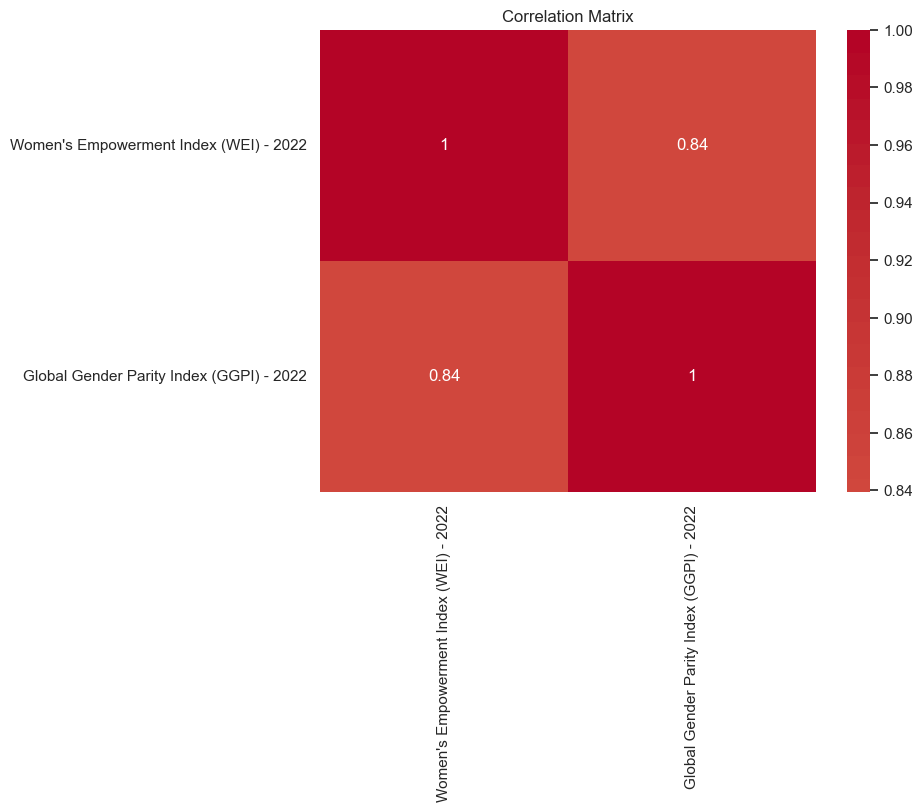

In [74]:
corr_matrix = df[['Women\'s Empowerment Index (WEI) - 2022', 'Global Gender Parity Index (GGPI) - 2022']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_1548\456844916.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sustainable Development Goal regions', y='Women\'s Empowerment Index (WEI) - 2022', data=df, estimator=np.mean, palette='viridis')


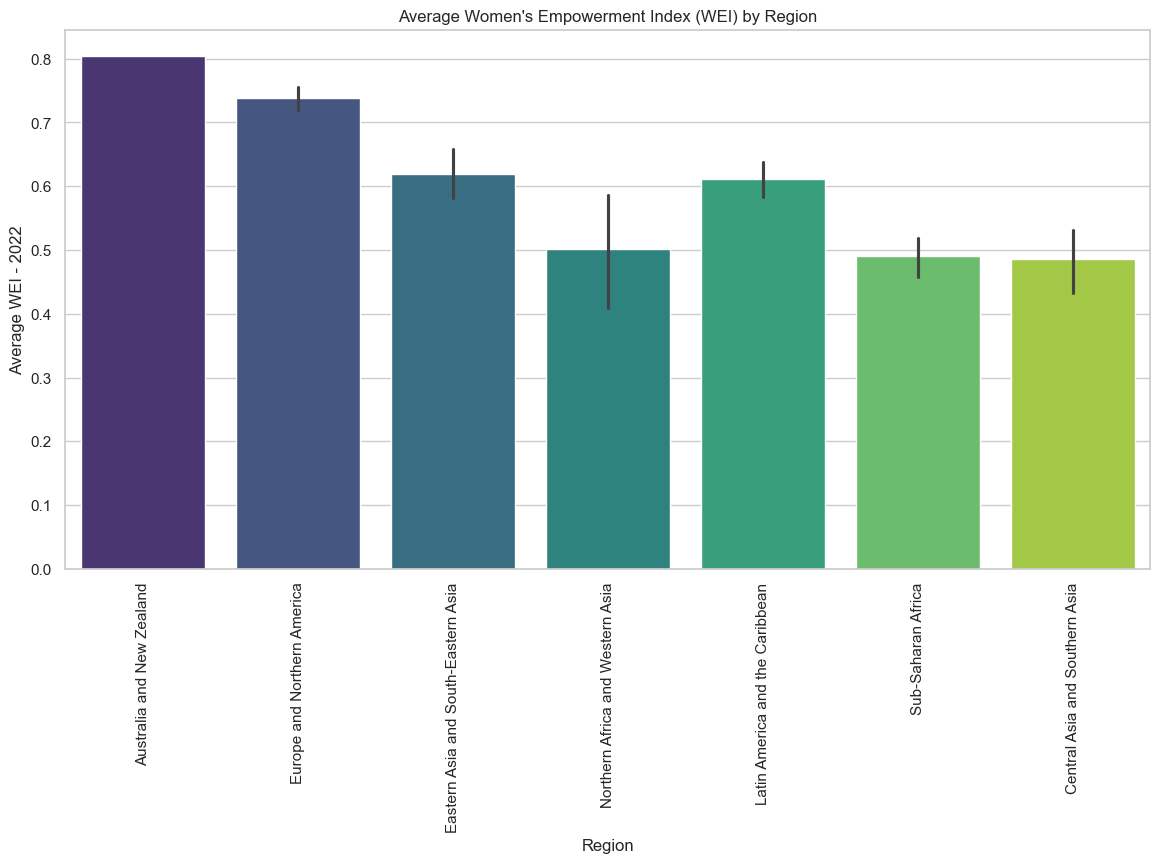

In [75]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Sustainable Development Goal regions', y='Women\'s Empowerment Index (WEI) - 2022', data=df, estimator=np.mean, palette='viridis')
plt.title('Average Women\'s Empowerment Index (WEI) by Region')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average WEI - 2022')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_1548\957930668.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Women\'s Empowerment Group - 2022', y='Women\'s Empowerment Index (WEI) - 2022', data=df, estimator=np.mean, palette='Set1')


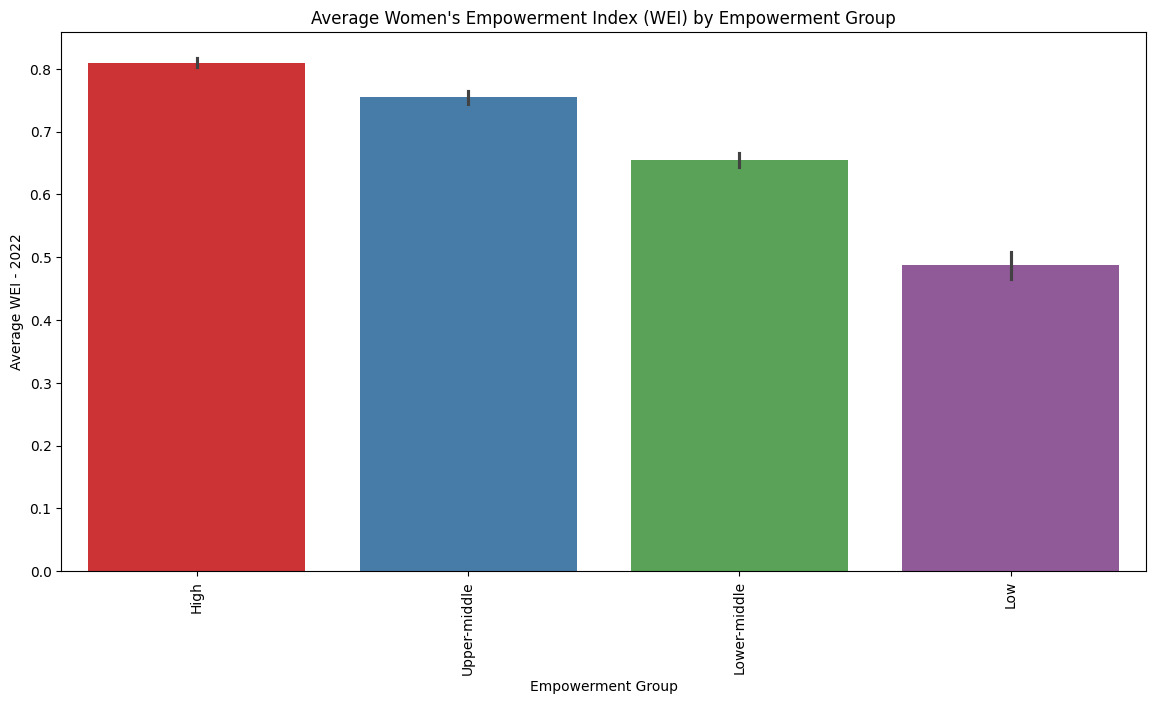

In [39]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Women\'s Empowerment Group - 2022', y='Women\'s Empowerment Index (WEI) - 2022', data=df, estimator=np.mean, palette='Set1')
plt.title('Average Women\'s Empowerment Index (WEI) by Empowerment Group')
plt.xticks(rotation=90)
plt.xlabel('Empowerment Group')
plt.ylabel('Average WEI - 2022')
plt.show()

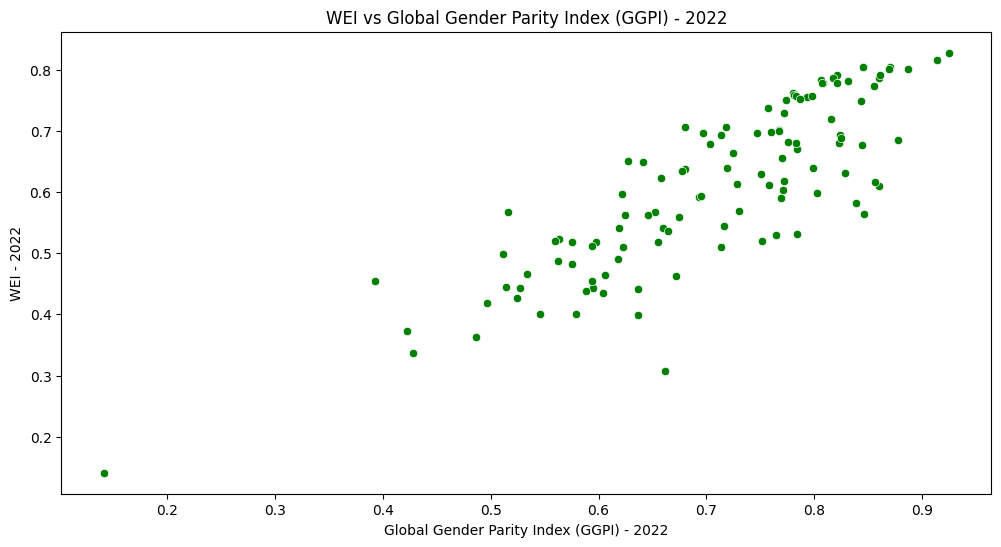

In [40]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Global Gender Parity Index (GGPI) - 2022', y='Women\'s Empowerment Index (WEI) - 2022', data=df, color='green')
plt.title('WEI vs Global Gender Parity Index (GGPI) - 2022')
plt.xlabel('Global Gender Parity Index (GGPI) - 2022')
plt.ylabel('WEI - 2022')
plt.show()

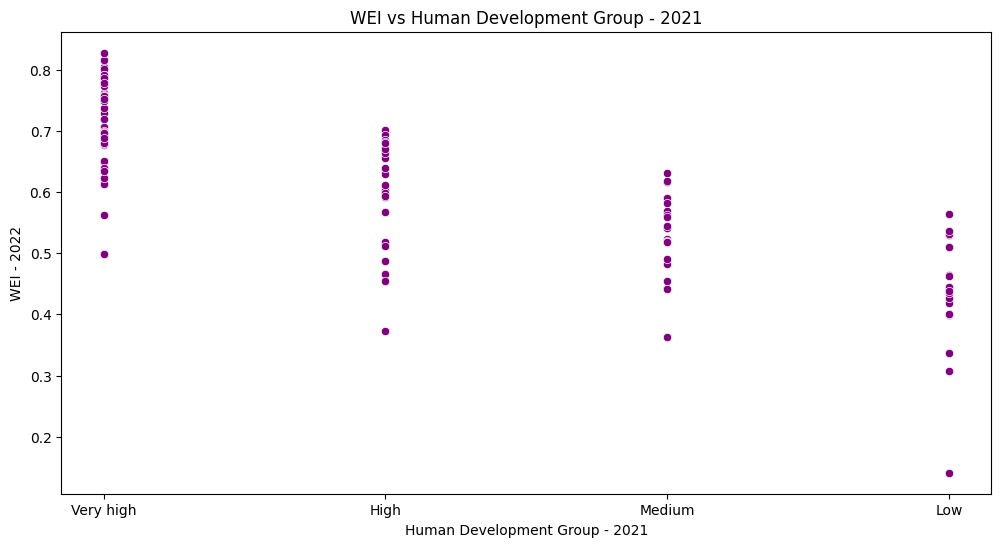

In [41]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Human Development Group - 2021', y='Women\'s Empowerment Index (WEI) - 2022', data=df, color='purple')
plt.title('WEI vs Human Development Group - 2021')
plt.xlabel('Human Development Group - 2021')
plt.ylabel('WEI - 2022')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_1548\1041651847.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Women\'s Empowerment Index (WEI) - 2022', y='Sustainable Development Goal regions', data=regional_wei, palette='Set3')


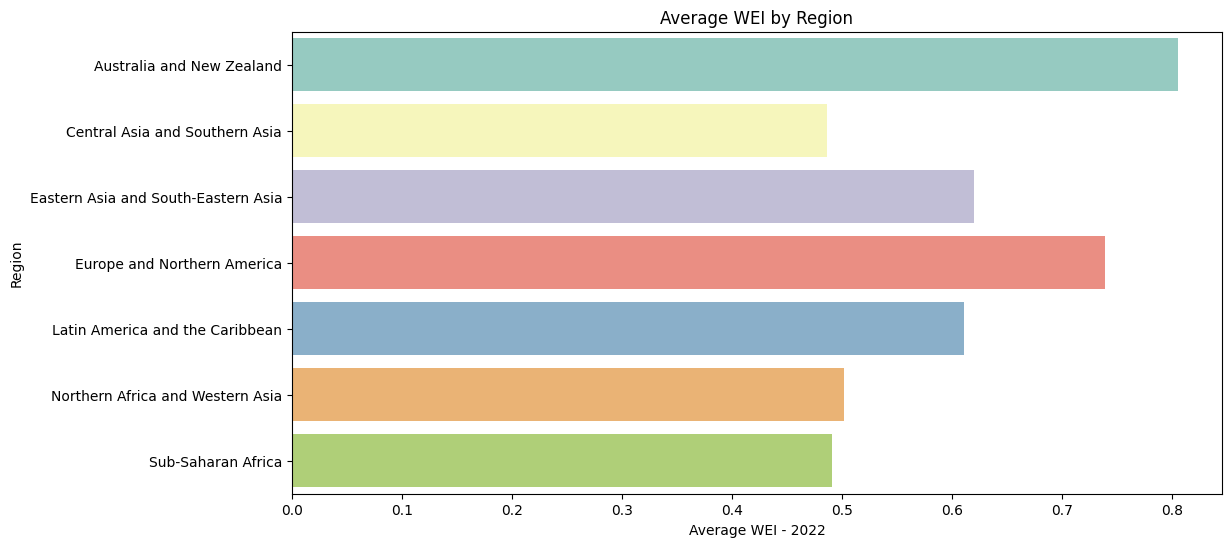

In [42]:
regional_wei = df.groupby('Sustainable Development Goal regions')['Women\'s Empowerment Index (WEI) - 2022'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Women\'s Empowerment Index (WEI) - 2022', y='Sustainable Development Goal regions', data=regional_wei, palette='Set3')
plt.title('Average WEI by Region')
plt.xlabel('Average WEI - 2022')
plt.ylabel('Region')
plt.show()

In [43]:
corr = df[['Women\'s Empowerment Index (WEI) - 2022', 'Global Gender Parity Index (GGPI) - 2022']].corr()
print("Correlation Matrix:\n", corr)

Correlation Matrix:
                                           Women's Empowerment Index (WEI) - 2022  \
Women's Empowerment Index (WEI) - 2022                                  1.000000   
Global Gender Parity Index (GGPI) - 2022                                0.839409   

                                          Global Gender Parity Index (GGPI) - 2022  
Women's Empowerment Index (WEI) - 2022                                    0.839409  
Global Gender Parity Index (GGPI) - 2022                                  1.000000  


In [44]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, Whisker
from bokeh.transform import jitter

# Ensures that the output is shown in the notebook
output_notebook()

# Creating the necessary columns
df['Empowerment Group'] = df['Women\'s Empowerment Group - 2022']
df['WEI'] = df['Women\'s Empowerment Index (WEI) - 2022']
source = ColumnDataSource(df)

# Creating a figure
p = figure(x_range=['High', 'Low'], title="WEI by Women's Empowerment Group - 2022",
           x_axis_label='Empowerment Group', y_axis_label='Women\'s Empowerment Index (WEI) - 2022',
           height=400, width=600)

# Added jittered circle markers for help with better visualisations
p.scatter(x=jitter('Empowerment Group', width=0.3, range=p.x_range), y='WEI',
          source=source, alpha=0.6, size=8, color='navy')

# Calculated the MEANS
high_mean = np.mean(high_group)
low_mean = np.mean(low_group)

# Added horizontal bars to indicate MEANS using the Whisker model
p.add_layout(Whisker(base='High', upper=high_mean, lower=high_mean, line_width=2, line_color='red', source=ColumnDataSource({'High': [0.5]})))
p.add_layout(Whisker(base='Low', upper=low_mean, lower=low_mean, line_width=2, line_color='green', source=ColumnDataSource({'Low': [1.5]})))

# Show the plot
show(p)

ModuleNotFoundError: No module named 'bokeh'

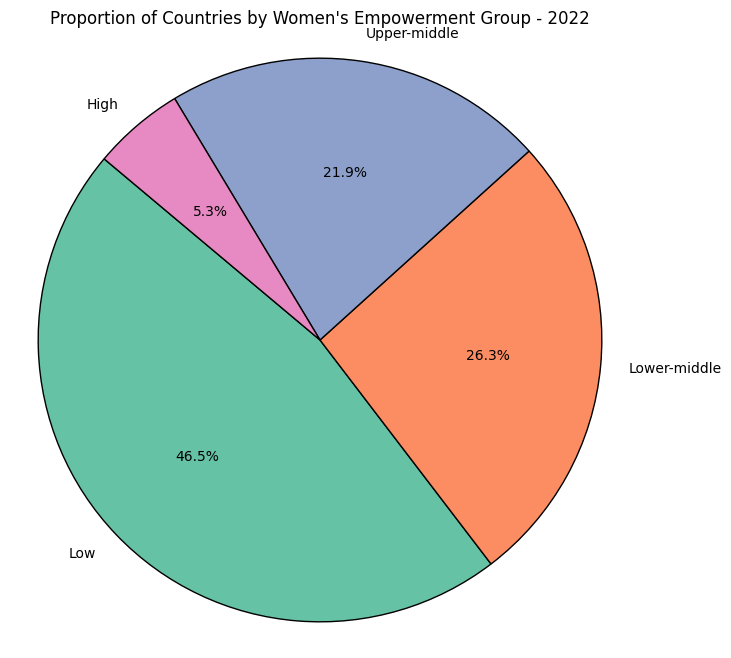

In [45]:
import matplotlib.pyplot as plt

# Calculating the proportion of countries in each empowerment group
group_counts = df['Women\'s Empowerment Group - 2022'].value_counts()
labels = group_counts.index
sizes = group_counts.values

# Pie chart colours
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']


plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Proportion of Countries by Women\'s Empowerment Group - 2022')
plt.axis('equal')  # The Equal aspect ratio makes sure the pie chart is circular.

plt.show()

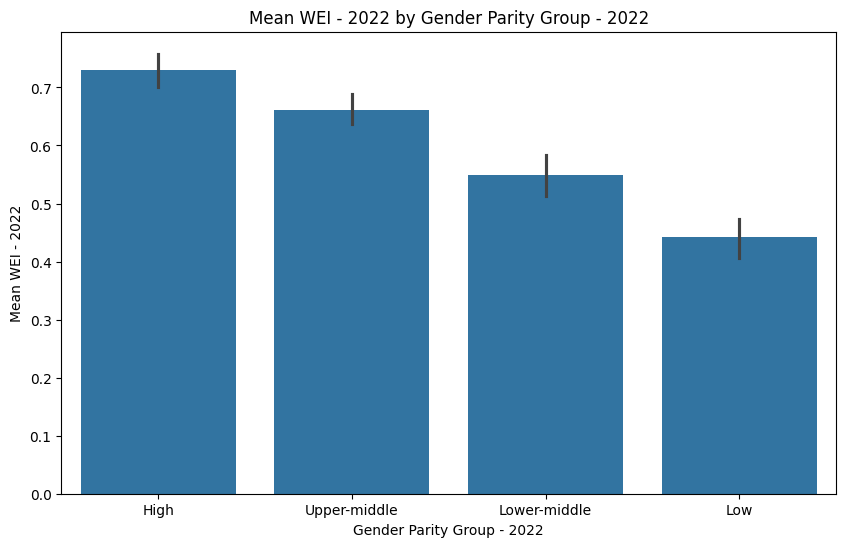

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Gender Parity Group - 2022', y='Women\'s Empowerment Index (WEI) - 2022', estimator=np.mean)
plt.title('Mean WEI - 2022 by Gender Parity Group - 2022')
plt.xlabel('Gender Parity Group - 2022')
plt.ylabel('Mean WEI - 2022')
plt.show()

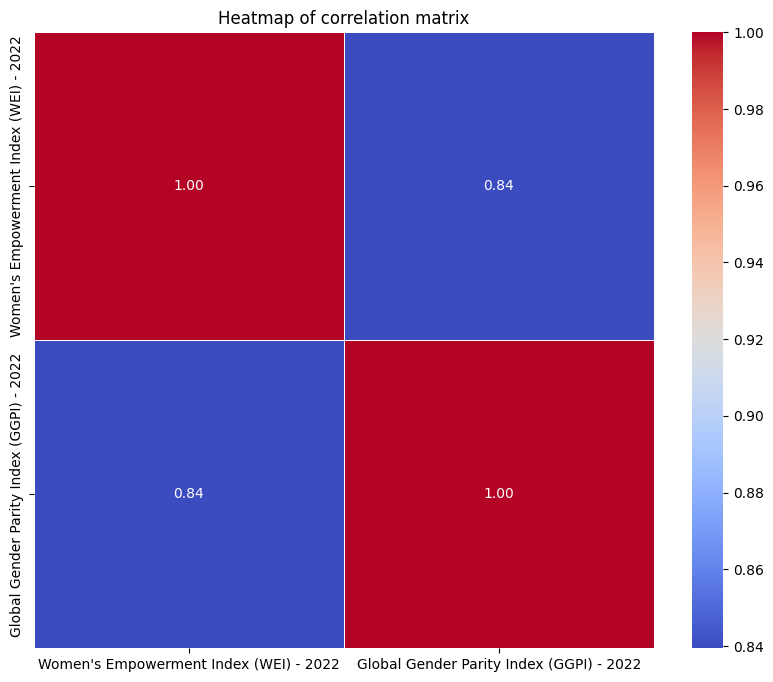

In [49]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of correlation matrix')
plt.show()

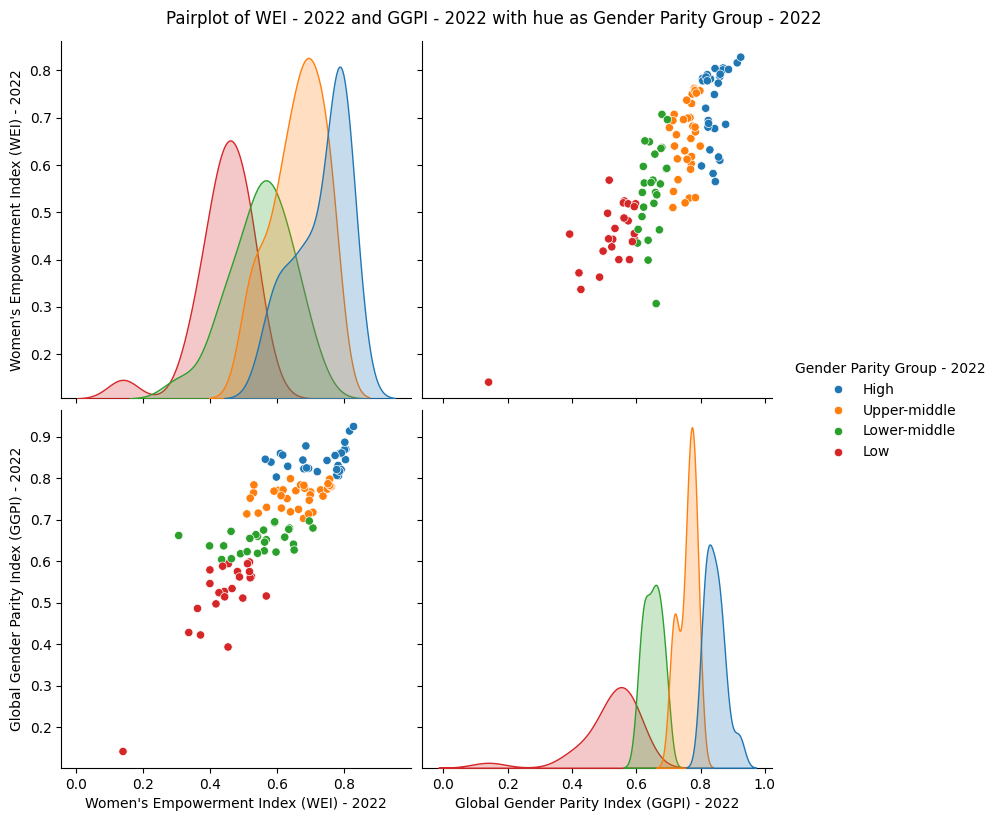

In [50]:
sns.pairplot(data=df, vars=['Women\'s Empowerment Index (WEI) - 2022', 'Global Gender Parity Index (GGPI) - 2022'],
             hue='Gender Parity Group - 2022', height=4)
plt.suptitle('Pairplot of WEI - 2022 and GGPI - 2022 with hue as Gender Parity Group - 2022', y=1.02)
plt.show()

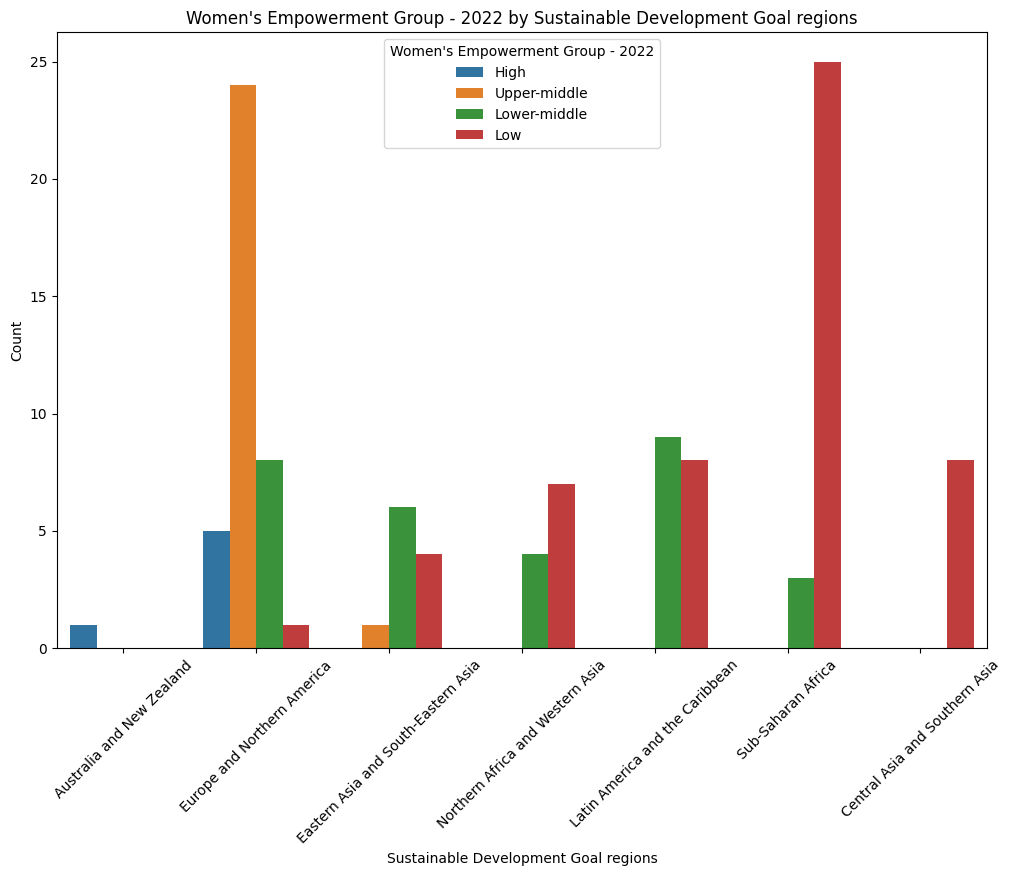

In [51]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Sustainable Development Goal regions', hue='Women\'s Empowerment Group - 2022')
plt.title('Women\'s Empowerment Group - 2022 by Sustainable Development Goal regions')
plt.xlabel('Sustainable Development Goal regions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Women\'s Empowerment Group - 2022')
plt.show()

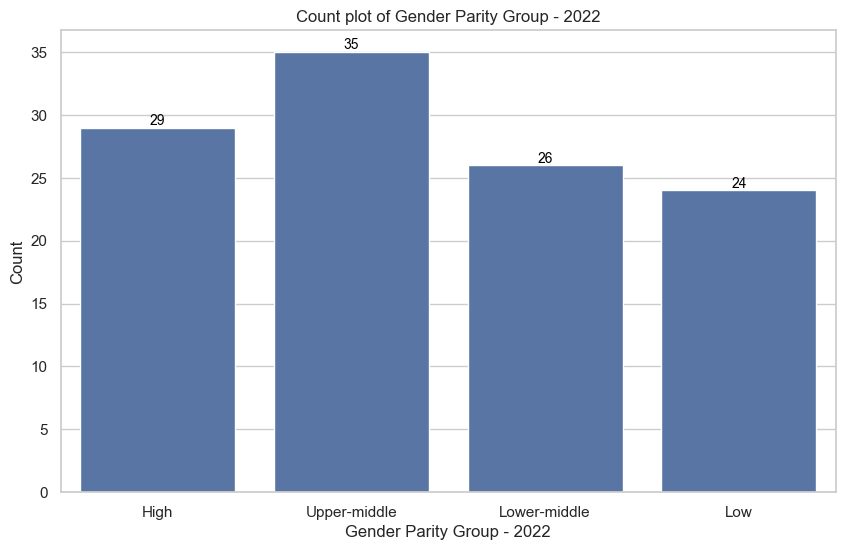

In [53]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.countplot(data=df, x='Gender Parity Group - 2022')

plt.title('Count plot of Gender Parity Group - 2022')
plt.xlabel('Gender Parity Group - 2022')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

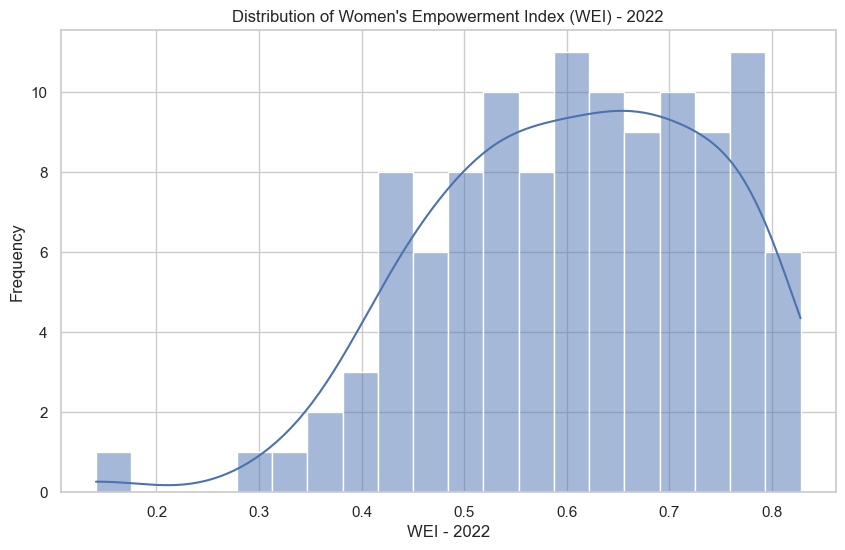

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Women\'s Empowerment Index (WEI) - 2022', bins=20, kde=True)
plt.title('Distribution of Women\'s Empowerment Index (WEI) - 2022')
plt.xlabel('WEI - 2022')
plt.ylabel('Frequency')
plt.show()